# Análise inicial do grafo

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Importando o grafo completo
G = nx.read_gexf('job_skill_graph.gexf')

## Tamanho do grafo

In [3]:
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
nodes_average_degree = 2 * total_edges / total_nodes
total_components = nx.number_connected_components(G)

print(f'Total de nós: {total_nodes}')
print(f'Total de arestas: {total_edges}')
print(f'Grau médio dos nós: {nodes_average_degree:.2f}')
print(f'Total de componentes: {total_components}')

Total de nós: 56076
Total de arestas: 339681
Grau médio dos nós: 12.12
Total de componentes: 1


## Distribuição de graus

### Nós com grau menor ou igual a 20

In [4]:
# Number of nodes with degree smaller or equal to 20
small_degree_nodes = [node for node, degree in G.degree() if degree <= 20]
print(f'Nós com grau menor ou igual a 20: {len(small_degree_nodes)} ({len(small_degree_nodes) / total_nodes * 100:.2f}%)')

Nós com grau menor ou igual a 20: 54145 (96.56%)


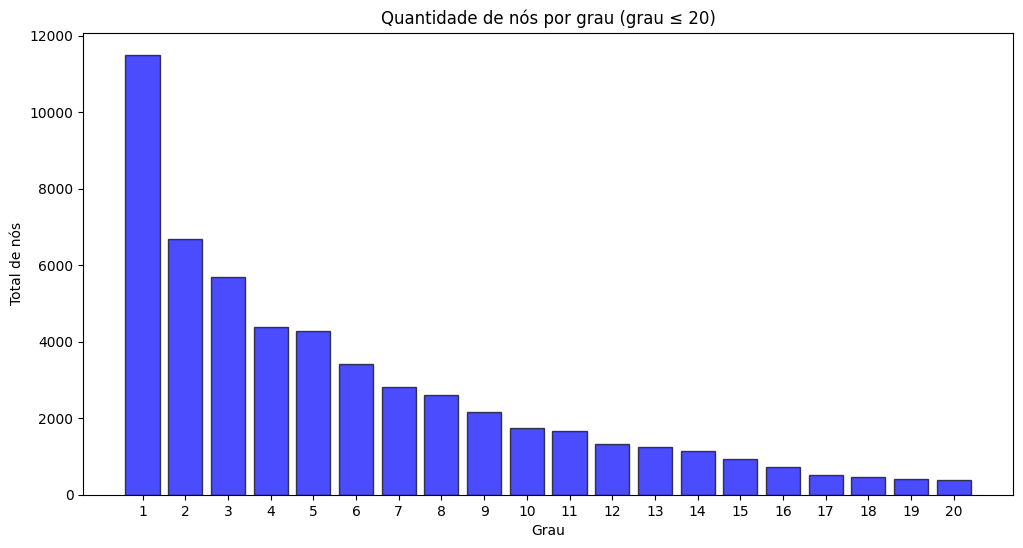

In [5]:
# Histogram of node degrees using 1 bin for each degree
small_degrees = [degree for _, degree in G.degree() if degree <= 20]

plt.figure(figsize=(12, 6))
plt.bar(*np.unique(small_degrees, return_counts=True), color='blue', edgecolor='black', alpha=0.7)
plt.title('Quantidade de nós por grau (grau ≤ 20)')

plt.xlabel('Grau')
plt.xticks(range(1, 21))
plt.ylabel('Total de nós')

plt.savefig('images/small_degree_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Number of nodes with degree equal to 1
one_degree_nodes = [node for node, degree in G.degree() if degree == 1]
print(f'Nós com grau igual a 1: {len(one_degree_nodes)} ({len(one_degree_nodes) / total_nodes * 100:.2f}%)')

Nós com grau igual a 1: 11507 (20.52%)


In [7]:
# Number of nodes with degree smaller or equal to 20 that are jobs
small_degree_job_nodes = [node for node in small_degree_nodes if G.nodes[node]['type'] == 'job']
print(f'Nós com grau menor ou igual a 20 que são jobs: {len(small_degree_job_nodes)} ({len(small_degree_job_nodes) / len(small_degree_nodes) * 100:.2f}%)')

Nós com grau menor ou igual a 20 que são jobs: 54027 (99.78%)


### Nós com grau maior do que 20

In [8]:
# Number of nodes with degree higher than 20
high_degree_nodes = [node for node, degree in G.degree() if degree > 20]
print(f'Nós com grau maior que 20: {len(high_degree_nodes)} ({len(high_degree_nodes) / total_nodes * 100:.2f}%)')

Nós com grau maior que 20: 1931 (3.44%)


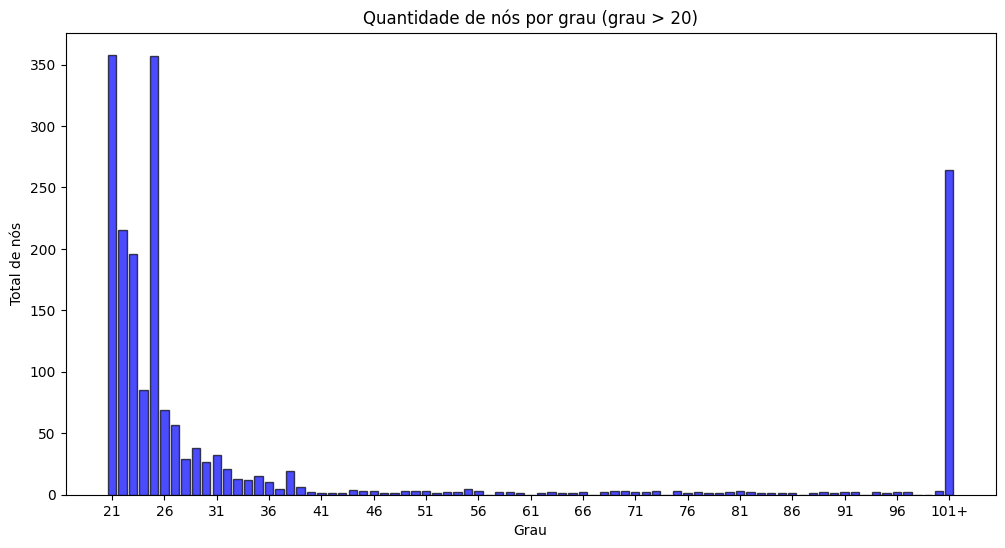

In [9]:
# Histogram of node degrees using 1 bin for each degree between 21 and 100 and grouping degrees above 100
high_degrees = [degree for _, degree in G.degree() if degree > 20]
high_degrees_grouped = [degree if degree <= 100 else 101 for degree in high_degrees]

# Count the number of values in each bin
counts, bin_edges = np.histogram(high_degrees_grouped, bins=range(21, 103)) # bin edges from 21 to 102
bin_labels = [f'{i}' for i in range(21, 101)] + ['101+']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(bin_labels, counts, color='blue', edgecolor='black', alpha=0.7)
plt.title('Quantidade de nós por grau (grau > 20)')

plt.xlabel('Grau')
# Set x-axis ticks to show every 5th label
ticks_to_show = bin_labels[::5]
tick_positions = [bin_labels.index(label) for label in ticks_to_show]
plt.xticks(tick_positions, ticks_to_show)

plt.ylabel('Total de nós')

plt.savefig('images/high_degree_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

### Nós com grau maior do que 100

In [10]:
# Number of nodes with degree greater than 100
high_degree_nodes = [node for node, degree in G.degree() if degree > 100]
print(f'Nós com grau maior que 100: {len(high_degree_nodes)} ({len(high_degree_nodes) / total_nodes * 100:.2f}%)')

Nós com grau maior que 100: 264 (0.47%)


In [11]:
# Number of nodes with degree greater than 100 that are skills
high_degree_skill_nodes = [node for node in high_degree_nodes if G.nodes[node]['type'] == 'skill']
print(f'Nós com grau maior que 100 que são skills: {len(high_degree_skill_nodes)} ({len(high_degree_skill_nodes) / len(high_degree_nodes) * 100:.2f}%)')

Nós com grau maior que 100 que são skills: 264 (100.00%)


In [12]:
# Number of nodes with degree between 100 and 500
high_degree_smaller_than_500 = [node for node in high_degree_nodes if G.degree(node) < 500]
print(f'Nós com grau maior que 100 e menor que 500: {len(high_degree_smaller_than_500)} ({len(high_degree_smaller_than_500) / len(high_degree_nodes) * 100:.2f}%)')

# Number of nodes with degree between 100 and 1000
high_degree_smaller_than_1000 = [node for node in high_degree_nodes if G.degree(node) < 1000]
print(f'Nós com grau maior que 100 e menor que 1000: {len(high_degree_smaller_than_1000)} ({len(high_degree_smaller_than_1000) / len(high_degree_nodes) * 100:.2f}%)')

# Number of nodes with degree between 100 and 5000
high_degree_smaller_than_5000 = [node for node in high_degree_nodes if G.degree(node) < 5000]
print(f'Nós com grau maior que 100 e menor que 5000: {len(high_degree_smaller_than_5000)} ({len(high_degree_smaller_than_5000) / len(high_degree_nodes) * 100:.2f}%)')

Nós com grau maior que 100 e menor que 500: 134 (50.76%)
Nós com grau maior que 100 e menor que 1000: 193 (73.11%)
Nós com grau maior que 100 e menor que 5000: 250 (94.70%)


In [13]:
# Biggest degree found
biggest_degree_node = max(G.degree, key=lambda x: x[1])
print(f"Grau máximo encontrado: {biggest_degree_node[1]} (nó {biggest_degree_node[0]})")

Grau máximo encontrado: 12783 (nó sql)
